In [4]:
import os
import cv2 as cv
import matplotlib.pyplot as plt

In [5]:
#muestra que se quiere comparar

sample_path = r"\BaseDatosNISTsd09_pr"
sample_path = os.getcwd()+sample_path
files= os.listdir(sample_path)

# Busca en el directorio a cada uno de los sujetos
counter=0 
print(files)
for file in files:
    dir = sample_path +'\\'
    dir = dir + file + '\\'
    file2= os.listdir(dir)
    ruta=dir+'\\'+file2[0]
    sample = cv.imread(ruta) #muestras para tomar de referencia
    counter+=1
    #segundo bucle para comparar con todas
    for file in files:
        dir = sample_path +'\\'
        dir = dir + file + '\\'
        file2= os.listdir(dir)
        ruta=dir+'\\'+file2[1] 
        sample2 = cv.imread(ruta) #muestras para tomar de referencia
     
    
    
    

['crd_0811f', 'crd_0812f', 'crd_0813f', 'crd_0814f', 'crd_0815f', 'crd_0816f', 'crd_0817f', 'crd_0818f', 'crd_0819f', 'crd_0820f']


A partir de la base de datos proporcionada, se realizará un programa que permita identificar las huellas del mismo usuario y descartar el resto, dando información cuantitativa de la similitud entre las huellas, pudiendo utilizar openCV, numpy, os, PyTorch,..., pero no funciones descargadas especialmente para trabajar con huellas dactilares.

Se obtendrá la función densidad de probabilidad, la curva DET, la curva ROC., el valor EER y el valor AUC.

Se realizará un póster (una única transparencia) y se presentará durante la última semana de clase. Además, se entregará el código usado.

En la presentación tienen que tratarse los siguientes puntos:

-Hipótesis de partida.

-Metodología utilizada y explicación de su desarrollo.

-Resultados (curvas, EER y AUC).

-Conclusiones.

-Fuentes principales consultadas.

In [ ]:
#TODO:
# 1. Limpieza: id y separar la huella
# 2. Eliminación de ruido

#TODO: Data augmentation
# 1. Rotación: tener en cuenta el fondo
# luminosidad

#TODO: Moselo / sistema / lo q sea
# SIFT
# CONVOLUTIVA

# MATCHING DE PATRONES

In [59]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os

## 1. Limpieza del dataset

### 1.2. Extraer la huella de la imagen

In [70]:
def delete_frame(img):
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


    edges = cv.Canny(gray, 50, 150, apertureSize=3)
    vertical_lines = cv.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=100, maxLineGap=10)

    detected_coords = []
    detected_horizontal_coords = []

    for line in vertical_lines:
        x1, y1, x2, y2 = line[0]
        if abs(x1 - x2) < 11:
            detected_coords.append((x1, y1, x2, y2))
        elif abs(y1 - y2) < 11:
            detected_horizontal_coords.append((x1, y1, x2, y2))

    horizontal_lines = cv.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=100, maxLineGap=10)

    # coordenada minima en x
    min_vertical_x = min(detected_coords, key=lambda x: x[0])[0]
    min_vertical_y = min(detected_horizontal_coords, key=lambda x: x[1])[1]

    max_horizontal_x = max(detected_horizontal_coords, key=lambda x: x[0])[0]
    max_horizontal_y = max(detected_coords, key=lambda x: x[1])[1]

    min_x = min(min_vertical_x, max_horizontal_x)
    max_y = max(min_vertical_y, max_horizontal_y)

    return img[0:max_y, 0:min_x]

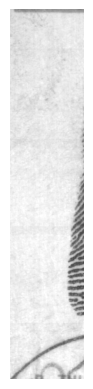

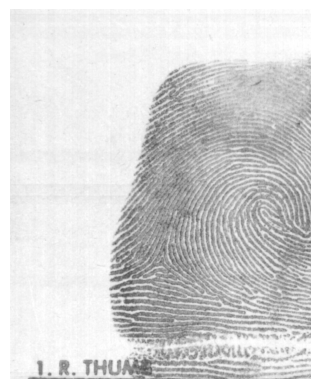

In [72]:
sample_path ='./BaseDatosNISTsd09_pr/'
sample_path = os.getcwd()+sample_path
subfolders= os.listdir(sample_path)

for subfolder in subfolders:
    files = os.listdir(sample_path + subfolder)
    for file in files:
        img = cv.imread(sample_path + subfolder + '/' + file)
        img = delete_frame(img)
        plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
    break


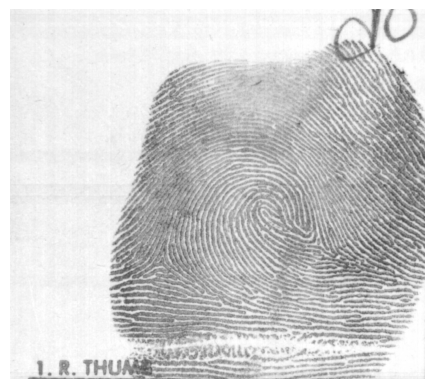

In [57]:
route = './BaseDatosNISTsd09_pr/crd_0811f/crd_0811s_01.png'
img = cv.imread(route)
img_orig = img.copy()


# cortar la imagen por min_x y max de y
img = delete_frame(img)

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### 1.3. Eliminación de ruido

In [ ]:
# grayscale = cv2.cvtColor(adjusted, cv2.COLOR_RGB2GRAY)
# 

## 2. Aumento de datos (Data Augmentation)

## 3. Planteamiento del sistema